In [1]:
import pandas as pd
import numpy as np
print(np.__version__)
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import pearsonr
from scipy import stats
from scipy import signal
from oasis.functions import deconvolve

import matplotlib.pyplot as plt
import numpy as np
import os
from rastermap import Rastermap
from scipy.stats import zscore
from tqdm import tqdm
import warnings
warnings.simplefilter("ignore")

import scaling_analysis as sa
from scaling_analysis.experiment import Experiment
from scaling_analysis.plotting import set_my_rcParams, plot_MIPs, plot_neurons_behavior, calc_var_expl
from scaling_analysis.predict import predict_from_behavior
# from scaling_analysis.predict_ym import predict_from_behavior_ym
from scaling_analysis.spatial import local_homogeneity
from scaling_analysis.temporal import compute_timescales

set_my_rcParams()

# PARAMETERS
# Note: these analyses can take quite some time to run for large neuron numbers
# Reduce nneurs, nsamplings, nsvc, and/or nsvc_predict for smaller, efficient tests
checkerboard = 50            # size of lateral checkerboard pattern to split neural sets, in um
nsamplings = 3                 # number of samplings to perform
lag = 0                        # lag between motion and neural data, in frames
# interleave = int(72*fhz_Ca)   # length of chunks that are randomly assigned to training or testing, in frames
interleave = 50
nsvc = 512                     # number of SVCs to find
nsvc_predict = 256               # number of SVCs to predict from behavior
lams = [0.01, 0.1]              # regularization parameters for reduced rank regression of neural SVCs
# lams = [1e-3,5e-3,0.01,0.05,0.1,0.15,0.3]
ranks = np.unique(np.round(     # ranks to test in reduced rank regression of neural SVCs
    2 ** np.arange(2,8))
                 ).astype(int)

MLPregressor = True             # whether or not to fit MLP nonlinear model
prePCA = False                   # whether or not to perform PCA before running SVCA
                                 #         (saves memory for large neuron number, but takes longer)

lams = [0.1]              # regularization parameters for reduced rank regression of neural SVCs
# lams = [1e-3,5e-3,0.01,0.05,0.1,0.15,0.3]
ranks = np.unique(np.round(     # ranks to test in reduced rank regression of neural SVCs
    2 ** np.arange(7,8))
                 ).astype(int)

1.24.4


C:\Users\12770\anaconda3\envs\ym\lib\site-packages\oasis\functions.py:13: UserWarning: Could not find cvxpy. Don't worry, you can still use OASIS, just not the slower interior point methods we compared to in the papers.
  warn("Could not find cvxpy. Don't worry, you can still use OASIS, " +


Processing data for m010iso2
###————————————————————————————————Step1.preprocessing ECoG and calcium data......——————————————————————————————————————————————————————###
neurons: (9676, 17655)
centers: (2, 17655)
fp_32chs_example: (900000, 32)
2025-05-01 01:45:18,048 [INFO] normalizing data across axis=1
2025-05-01 01:45:21,603 [INFO] projecting out mean along axis=0
2025-05-01 01:45:23,482 [INFO] data normalized, 5.43sec
2025-05-01 01:45:23,485 [INFO] sorting activity: 17655 valid samples by 9000 timepoints
2025-05-01 01:45:32,614 [INFO] n_PCs = 32 computed, 14.57sec
2025-05-01 01:45:33,834 [INFO] 8 clusters computed, time 15.79sec
2025-05-01 01:45:33,842 [INFO] clusters sorted, time 15.79sec
2025-05-01 01:45:33,899 [INFO] clusters upsampled, time 15.85sec
2025-05-01 01:45:34,469 [INFO] rastermap complete, time 16.42sec
neuron_example: (9000, 17655)
ploting ECoG Features......(savefigs_1=1)
###———————————————————————————————————————————Step2.loading ECoG Features......—————————————————

  0%|          | 0/1 [00:00<?, ?it/s]

ntrain: (7849,) 0 - 17654
ntest: (8827,) 3 - 17652
interleave i: 50
itrain: (4451,) 0 - 8900
itest: (4500,) 1 - 8950



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.59it/s]

100%|██████████| 1/1 [01:26<00:00, 86.69s/it]


actual_nneurs: (1,)
actual_nneurs: [7849.]
###—————————————————————————————————————————————Step4.Reduce Rank Regression......—————————————————————————————————————————————————————————###
u: (7849, 512)
v: (8827, 512)
ntrain: (7849,)
ntest: (8827,)
itrain: (4451,)
itest: (4500,)
trainX: (9000, 7849)
testX: (9000, 8827)
projs1: (9000, 256)
projs2: (9000, 256)
(2, 16676)
nrank1: [128]


  0%|          | 0/1 [00:00<?, ?it/s]

vp_train: (256, 9000)
vp_test: (256, 9000)
projs1: (9000, 256)
projs2: (9000, 256)
2025-05-01 01:49:11,108 [INFO] maxp pruned
2025-05-01 01:49:11,123 [INFO] cmap pruned
2025-05-01 01:49:11,129 [INFO] kern dropped
2025-05-01 01:49:11,130 [INFO] post pruned
2025-05-01 01:49:11,132 [INFO] FFTM dropped
2025-05-01 01:49:11,136 [INFO] GPOS pruned
2025-05-01 01:49:11,140 [INFO] GSUB pruned
2025-05-01 01:49:11,147 [INFO] glyf pruned
2025-05-01 01:49:11,148 [INFO] Added gid0 to subset
2025-05-01 01:49:11,150 [INFO] Added first four glyphs to subset
2025-05-01 01:49:11,150 [INFO] Closing glyph list over 'MATH': 28 glyphs before
2025-05-01 01:49:11,151 [INFO] Glyph names: ['.notdef', '.null', 'C', 'S', 'V', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'i', 'l', 'm', 'minus', 'nonmarkingreturn', 'one', 'p', 'r', 's', 'seven', 'six', 'space', 't', 'three', 'two', 'zero']
2025-05-01 01:49:11,153 [INFO] Glyph IDs:   [0, 1, 2, 3, 19, 20, 21, 22, 23, 24, 25, 26, 27, 38, 54, 57, 68, 70, 71, 72, 76, 79, 


100%|██████████| 1/1 [06:18<00:00, 378.36s/it]

Plot saved at C:/Users/12770/Desktop/project_ym_update/Result/m010iso2\predicted_neurons_versus_trainX_testX\Train_Only


###————————————————————————————————————————————Step5. Compute and Plot Shuffled SVCs...—————————————————————————————————————————————————###
SAMPLING 1 OUT OF 1


  0%|          | 0/1 [00:00<?, ?it/s]

ntrain: (6978,) 1 - 16668
ntest: (8827,) 0 - 16675
interleave i: 50
itrain: (4500,) 1 - 8800
itest: (4451,) 0 - 8950



  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  2.47it/s]

100%|██████████| 1/1 [01:36<00:00, 96.08s/it]


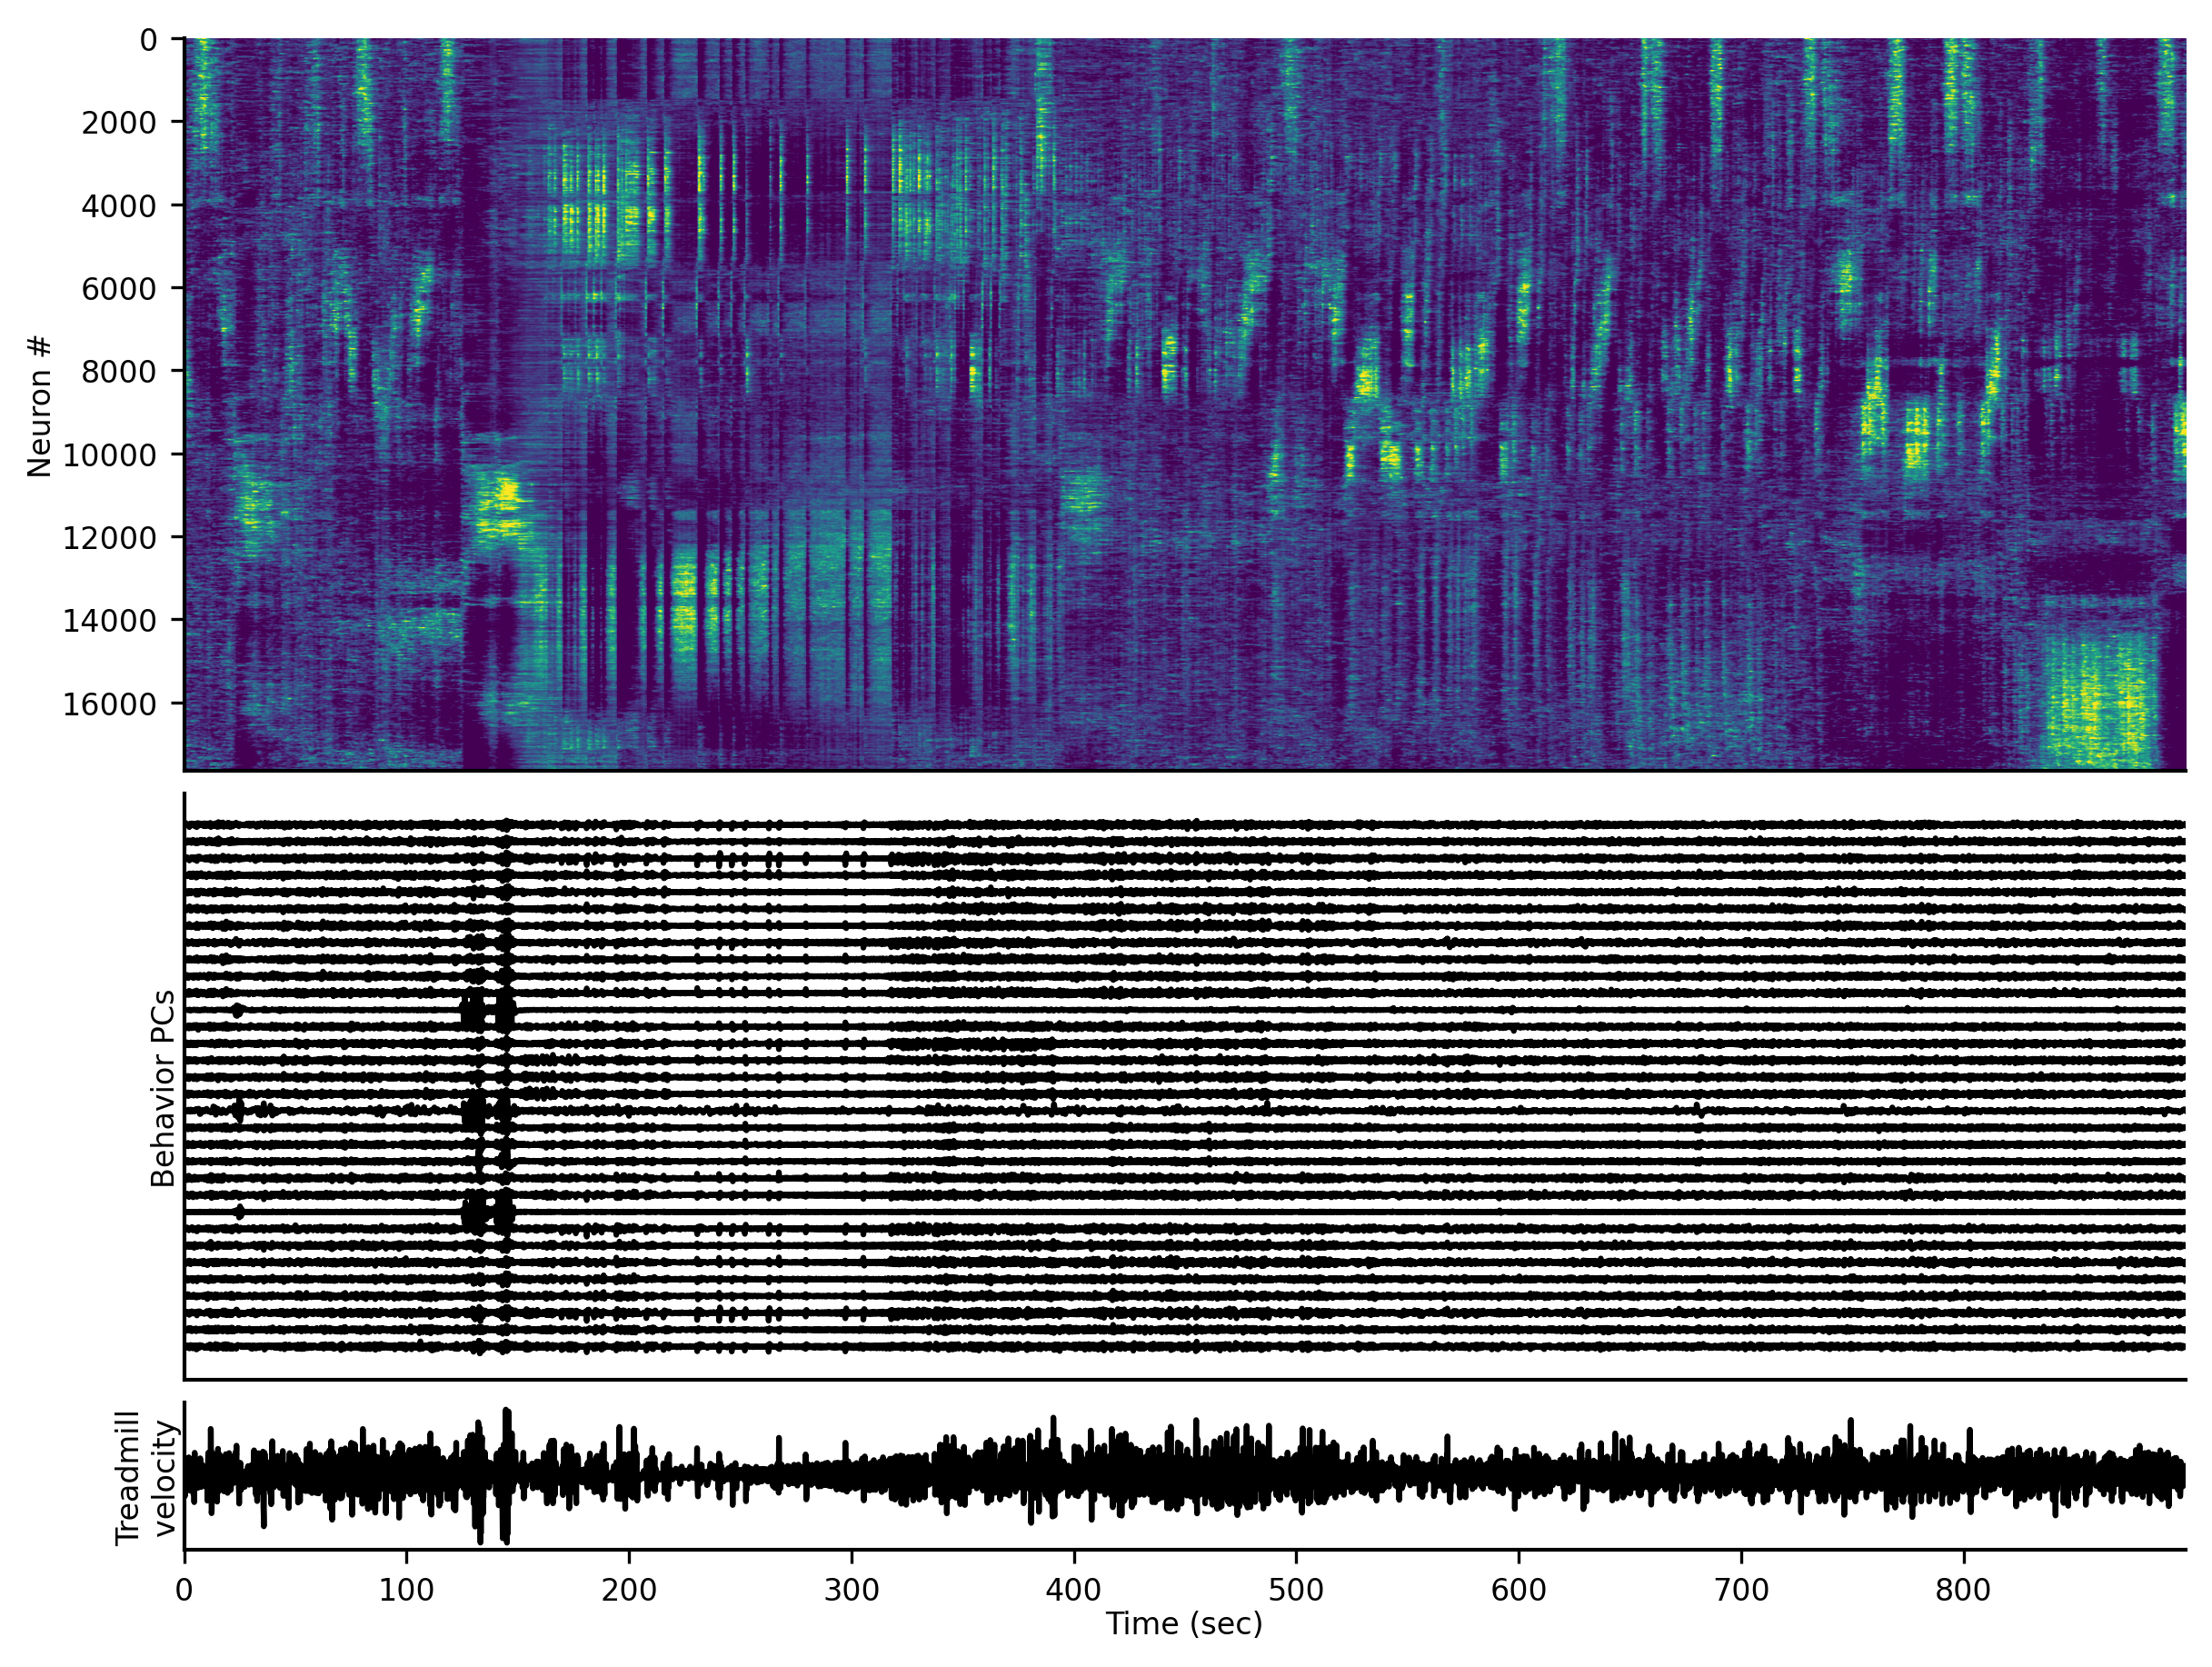

<Figure size 4500x7500 with 0 Axes>

<Figure size 4500x7500 with 0 Axes>

<Figure size 4500x7500 with 0 Axes>

<Figure size 4500x7500 with 0 Axes>

<Figure size 4500x7500 with 0 Axes>

<Figure size 4500x7500 with 0 Axes>

In [2]:
###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###

import logging
# 设置日志级别为 WARNING，这将屏蔽 INFO 和 DEBUG 级别的信息
logging.getLogger().setLevel(logging.WARNING)

import os
import matplotlib.pyplot as plt
from scaling_analysis.utils_ym import (
    preprocess_calcium_data,
    preprocess_ecog_data,
    perform_rastermap_analysis,
    downsample_signal,
    extract_all_features,
    zscore_and_visualize_ecog_features,
    get_list_shape,
    reduced_rank_regressions_ym,
    reduced_rank_regressions_ym_2,
    plot_svc_time_series
)
from scaling_analysis.plotting import plot_neurons_behavior
import numpy as np

savefigs_1 = 1
perform_rastermap = 1
###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
# 数据和结果路径配置
base_load_path = 'C:/Users/12770/Desktop/project_ym_update/Data/'
base_res_path = 'C:/Users/12770/Desktop/project_ym_update/Result/'

# mice_ids = ['m005iso1', 'm009iso1', 'm009iso2', 'm010iso1', 'm010iso2']
mice_ids = ['m010iso2']

kbd_evt_values = {
    'm010iso2': {'KBD1': 191.4293, 'EVT06': 10.41715},
    'm010iso1': {'KBD1': 235.23225, 'EVT06': 34.06705},
    'm009iso2': {'KBD1': 158.6044, 'EVT06': 36.249525},
    'm009iso1': {'KBD1': 146.826075, 'EVT06': 18.017625},
    'm005iso1': {'KBD1': 176.819025, 'EVT06': 34.28035}
}
###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
for mouse_id in mice_ids:
    load_path = os.path.join(base_load_path, mouse_id)
    res_path = os.path.join(base_res_path, mouse_id)

    print(f"Processing data for {mouse_id}")
    
    # 获取 KBD1 和 EVT06
    KBD1 = kbd_evt_values[mouse_id]['KBD1']
    EVT06 = kbd_evt_values[mouse_id]['EVT06']
    ###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
    print("###————————————————————————————————Step1.preprocessing ECoG and calcium data......——————————————————————————————————————————————————————###")
    # Step1.预处理钙信号数据和 ECoG 信号数据
    neurons, centers = preprocess_calcium_data(res_path, load_path)
    print("neurons:",neurons.shape)
    print("centers:",centers.shape)
    
    fp_32chs_example = preprocess_ecog_data(load_path, KBD1, EVT06)
    print("fp_32chs_example:", fp_32chs_example.shape)

    # Rastermap 分析
    neurons_example, neurons_sorted = perform_rastermap_analysis(neurons, KBD1, EVT06, perform_rastermap)    
    print("neuron_example:", neurons_example.shape)

    # 降采样
    fp_32chs_downsampled = downsample_signal(fp_32chs_example)
      
    # 绘图及保存   
    if savefigs_1:
        print("ploting ECoG Features......(savefigs_1=1)")
        t_idx_absolute_plot = np.arange(0, 9000)
        fig = plot_neurons_behavior(neurons_sorted, fp_32chs_downsampled, fp_32chs_downsampled[:, 25], t_idx_absolute_plot / 10)
    
        fig_folder = os.path.join(res_path, "fig6")
        os.makedirs(fig_folder, exist_ok=True)
    
        output_path_tif = os.path.join(fig_folder, "Ele_Cal_Pupil.tif")
        output_path_png = os.path.join(fig_folder, "Ele_Cal_Pupil.png")
    
        fig.savefig(output_path_tif, dpi=600, format='tif')
        fig.savefig(output_path_png, dpi=600, format='png')
    ###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
    print("###———————————————————————————————————————————Step2.loading ECoG Features......—————————————————————————————————————————————————————————###")
    # Step2.提取ECoG_Features, 如果已经有了就读取ECoG_Features
    feature_file_path = os.path.join(load_path, "ECoG_Extracted_Features.npy")
    if os.path.exists(feature_file_path):
        print(f"Features already extracted for {mouse_id}, skipping...")
    else:
        num_windows = fp_32chs_example.shape[0] // 100
        num_channels = fp_32chs_example.shape[1]
        output_matrix = extract_all_features(fp_32chs_example, num_windows, num_channels)
    
        np.save(feature_file_path, output_matrix)
        print(f"ECoG features saved for {mouse_id} at {feature_file_path}")
        
    ECoG_Extracted_Features = np.load(feature_file_path)
    print("ECoG_Extracted_Features:", ECoG_Extracted_Features.shape)
    zscore_and_visualize_ecog_features(ECoG_Extracted_Features, res_path, savefigs_1)
    ###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
    print("###—————————————————————————————————————————————Step3.SVCA and Prediction......—————————————————————————————————————————————————————————###")
    # Step3.SVCA and Prediction

    Test_Step_3 = 1
    t_start = 0
    t_end = 900
    nsamplings=1
    # nneurs = [256]
    nneurs = [neurons_example.shape[1]]
    # nneurs = 2 ** np.arange(13,15)   # numbers of neurons to sample
    
    if Test_Step_3 == 0:
        params = np.load(os.path.join(res_path, 'ex_u_v_ntrain_ntest_itrain_itest.npy'), allow_pickle=True).item()
        ex_u = params['ex_u']
        ex_v = params['ex_v']
        ex_ntrain = params['ex_ntrain']
        ex_ntest = params['ex_ntest']
        ex_itrain = params['ex_itrain']
        ex_itest = params['ex_itest']
        u = ex_u[-1]
        v = ex_v[-1]
        ntrain = ex_ntrain[-1]
        ntest = ex_ntest[-1]
        itrain = ex_itrain[-1]
        itest = ex_itest[-1]
    else:
        cov_neurs = np.zeros((len(nneurs), nsvc, nsamplings))+np.nan # reliable (co)variance
        var_neurs = np.zeros((len(nneurs), nsvc, nsamplings))+np.nan # total variance
        cov_res_behs = np.zeros((len(nneurs), nsvc_predict, len(ranks), len(lams), nsamplings))+np.nan # residual covariance                                                                                                   # after behavior prediction
        ex_u = []
        ex_v = []
        ex_ntrain = []
        ex_ntest = []
        ex_itrain = []
        ex_itest = []
        
        print("neurons_example:",neurons_example.shape)
        print("ECoG_Extracted_Features:",ECoG_Extracted_Features.shape)
        print("centers:",centers.shape)
        
        for n in range(len(nneurs)):
            print(nneurs[n], 'NEURONS')
            (cov_neur, var_neur, cov_res_beh, cov_res_beh_mlp, actual_nneurs, u, v,
            ntrain, ntest, itrain, itest, pca) = \
                predict_from_behavior(neurons_example[t_start*10:t_end*10,:], nneurs[n], centers, ECoG_Extracted_Features[t_start*10:t_end*10,:], ranks, nsamplings=nsamplings, lag=lag,
                                      lams=lams, nsvc=nsvc, nsvc_predict=nsvc_predict, checkerboard=checkerboard,
                                      prePCA=prePCA, MLPregressor=MLPregressor, interleave=interleave)
            
            cov_neurs[n,:] = cov_neur
            var_neurs[n,:] = var_neur
            cov_res_behs[n,:] = cov_res_beh       
            ex_u.append(u)
            ex_v.append(v)
            ex_ntrain.append(ntrain)
            ex_ntest.append(ntest)
            ex_itrain.append(itrain)
            ex_itest.append(itest)
            print("actual_nneurs:",actual_nneurs.shape)
            print("actual_nneurs:",actual_nneurs)
        # 保存计算得到的中间结果
        np.save(os.path.join(res_path, 'cov_var__cov_res_behs.npy'), {
            'cov_neurs': cov_neurs,
            'var_neurs': var_neurs,
            'cov_res_behs': cov_res_behs,
        })
        np.save(os.path.join(res_path, 'ex_u_v_ntrain_ntest_itrain_itest.npy'), {
            'ex_u': ex_u,
            'ex_v': ex_v,
            'ex_ntrain': ex_ntrain,
            'ex_ntest': ex_ntest,
            'ex_itrain': ex_itrain,
            'ex_itest': ex_itest
        })
    # plot_svc_time_series(neurons_example, ex_u, ex_v, ex_ntrain, ex_ntest, t_start, t_end, res_path,  f"{nneurs[-1]}neurons")
    # del neurons, centers, fp_32chs_example, neurons_sorted
   ###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
    print("###—————————————————————————————————————————————Step4.Reduce Rank Regression......—————————————————————————————————————————————————————————###")
    # Step4.Reduce Rank Regression
    test_step_4=1
    
    print("u:",u.shape)
    print("v:",v.shape)
    print("ntrain:",ntrain.shape)
    print("ntest:", ntest.shape)
    print("itrain:",itrain.shape)
    print("itest:",itest.shape)
       
    # calculate
    t_start = 0
    t_end = 900
    n_nneurs = 0
    trainX = neurons_example[t_start*10:t_end*10, ex_ntrain[n_nneurs]]
    testX = neurons_example[t_start*10:t_end*10, ex_ntest[n_nneurs]]
    projs1 = trainX @ ex_u[n_nneurs][:, :nsvc_predict]
    projs2 = testX @ ex_v[n_nneurs][:, :nsvc_predict] 
    print("trainX:",trainX.shape)
    print("testX:",testX.shape)
    print("projs1:",projs1.shape)
    print("projs2:",projs2.shape)
    
    warnings.simplefilter("ignore")
    centers=np.hstack((centers[:,ntrain], centers[:,ntest]))
    print(centers.shape)
    if test_step_4==1:
        result = reduced_rank_regressions_ym(ranks, 
                                               ECoG_Extracted_Features, 
                                               projs1, projs2, 
                                               lams, 
                                               res_path,
                                               ex_itrain, ex_itest, 
                                               ex_u, ex_v, 
                                               nsvc_predict, 
                                               trainX, testX,
                                               centers
                                            )


    
    ###————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————————###
    print("###————————————————————————————————————————————Step5. Compute and Plot Shuffled SVCs...—————————————————————————————————————————————————###")   
    # Define the number of shuffling samplings
    test_step_5 = 1
    if test_step_5 == 1:
        nsamplings_shuff = 1  # Ideally, more iterations provide a better distribution estimate
        
        # Initialize arrays for storing shuffled data
        cov_neurs_shuff = np.zeros((nsvc, nsamplings_shuff)) + np.nan
        var_neurs_shuff = np.zeros((nsvc, nsamplings_shuff)) + np.nan
        cov_res_behs_shuff = np.zeros((nsvc_predict, len(ranks), len(lams), nsamplings_shuff)) + np.nan
        
        ex_u_shuff = []
        ex_v_shuff = []
        ex_ntrain_shuff = []
        ex_ntest_shuff = []
        ex_itrain_shuff = []
        ex_itest_shuff = []
        
        # Run predict_from_behavior with shuffling to save example u, v every time SVCA is run
        for i in range(nsamplings_shuff):
            print(f"SAMPLING {i+1} OUT OF {nsamplings_shuff}")
            (cov_neur, var_neur, cov_res_beh, cov_res_beh_mlp, actual_nneurs, u, v,
             ntrain, ntest, itrain, itest, pca) = \
                predict_from_behavior(
                    neurons_example[t_start*10:t_end*10, :], nneurs[-1], centers, 
                    ECoG_Extracted_Features[t_start*10:t_end*10, :], ranks, nsamplings=1, lag=lag,
                    lams=lams, nsvc=nsvc, nsvc_predict=nsvc_predict, checkerboard=checkerboard,
                    prePCA=prePCA, MLPregressor=MLPregressor, interleave=interleave, shuffle=True)
        
            cov_neurs_shuff[:, i] = cov_neur[:, 0]
            var_neurs_shuff[:, i] = var_neur[:, 0]
            cov_res_behs_shuff[:, i] = cov_res_beh[:, 0]
            ex_u_shuff.append(u)
            ex_v_shuff.append(v)
            ex_ntrain_shuff.append(ntrain)
            ex_ntest_shuff.append(ntest)
            ex_itrain_shuff.append(itrain)
            ex_itest_shuff.append(itest)
        # 保存计算得到的中间结果
        np.save(os.path.join(res_path, 'ex_u_v_ntrain_ntest_itrain_itest_shuff.npy'), {
            'ex_u_shuff': ex_u_shuff,
            'ex_v_shuff': ex_v_shuff,
            'ex_ntrain_shuff': ex_ntrain_shuff,
            'ex_ntest_shuff': ex_ntest_shuff,
            'ex_itrain_shuff': ex_itrain_shuff,
            'ex_itest_shuff': ex_itest_shuff,
    
        })  
        np.save(os.path.join(res_path, 'cov_var__cov_res_behs_shuff.npy'), {
            'cov_neurs_shuff':cov_neurs_shuff,
            'var_neurs_shuff':var_neurs_shuff,
            'cov_res_behs_shuff':cov_res_behs_shuff   
        })
    else:
        params = np.load(os.path.join(res_path, 'ex_u_v_ntrain_ntest_itrain_itest_shuff.npy'), allow_pickle=True).item()
        ex_u_shuff = params['ex_u_shuff']
        ex_v_shuff = params['ex_v_shuff']
        ex_ntrain_shuff = params['ex_ntrain_shuff']
        ex_ntest_shuff = params['ex_ntest_shuff']
        ex_itrain_shuff = params['ex_itrain_shuff']
        ex_itest_shuff = params['ex_itest_shuff']
    # plot_svc_time_series(neurons_example, ex_u_shuff, ex_v_shuff, ex_ntrain_shuff, ex_ntest_shuff, t_start, t_end, res_path,  f"{nneurs[-1]}neurons_shuff")



________________________________________________m005iso1________________________________________________________
________________________________________________m009iso1________________________________________________________
________________________________________________m009iso2________________________________________________________
________________________________________________m010iso1________________________________________________________
________________________________________________m010iso2________________________________________________________


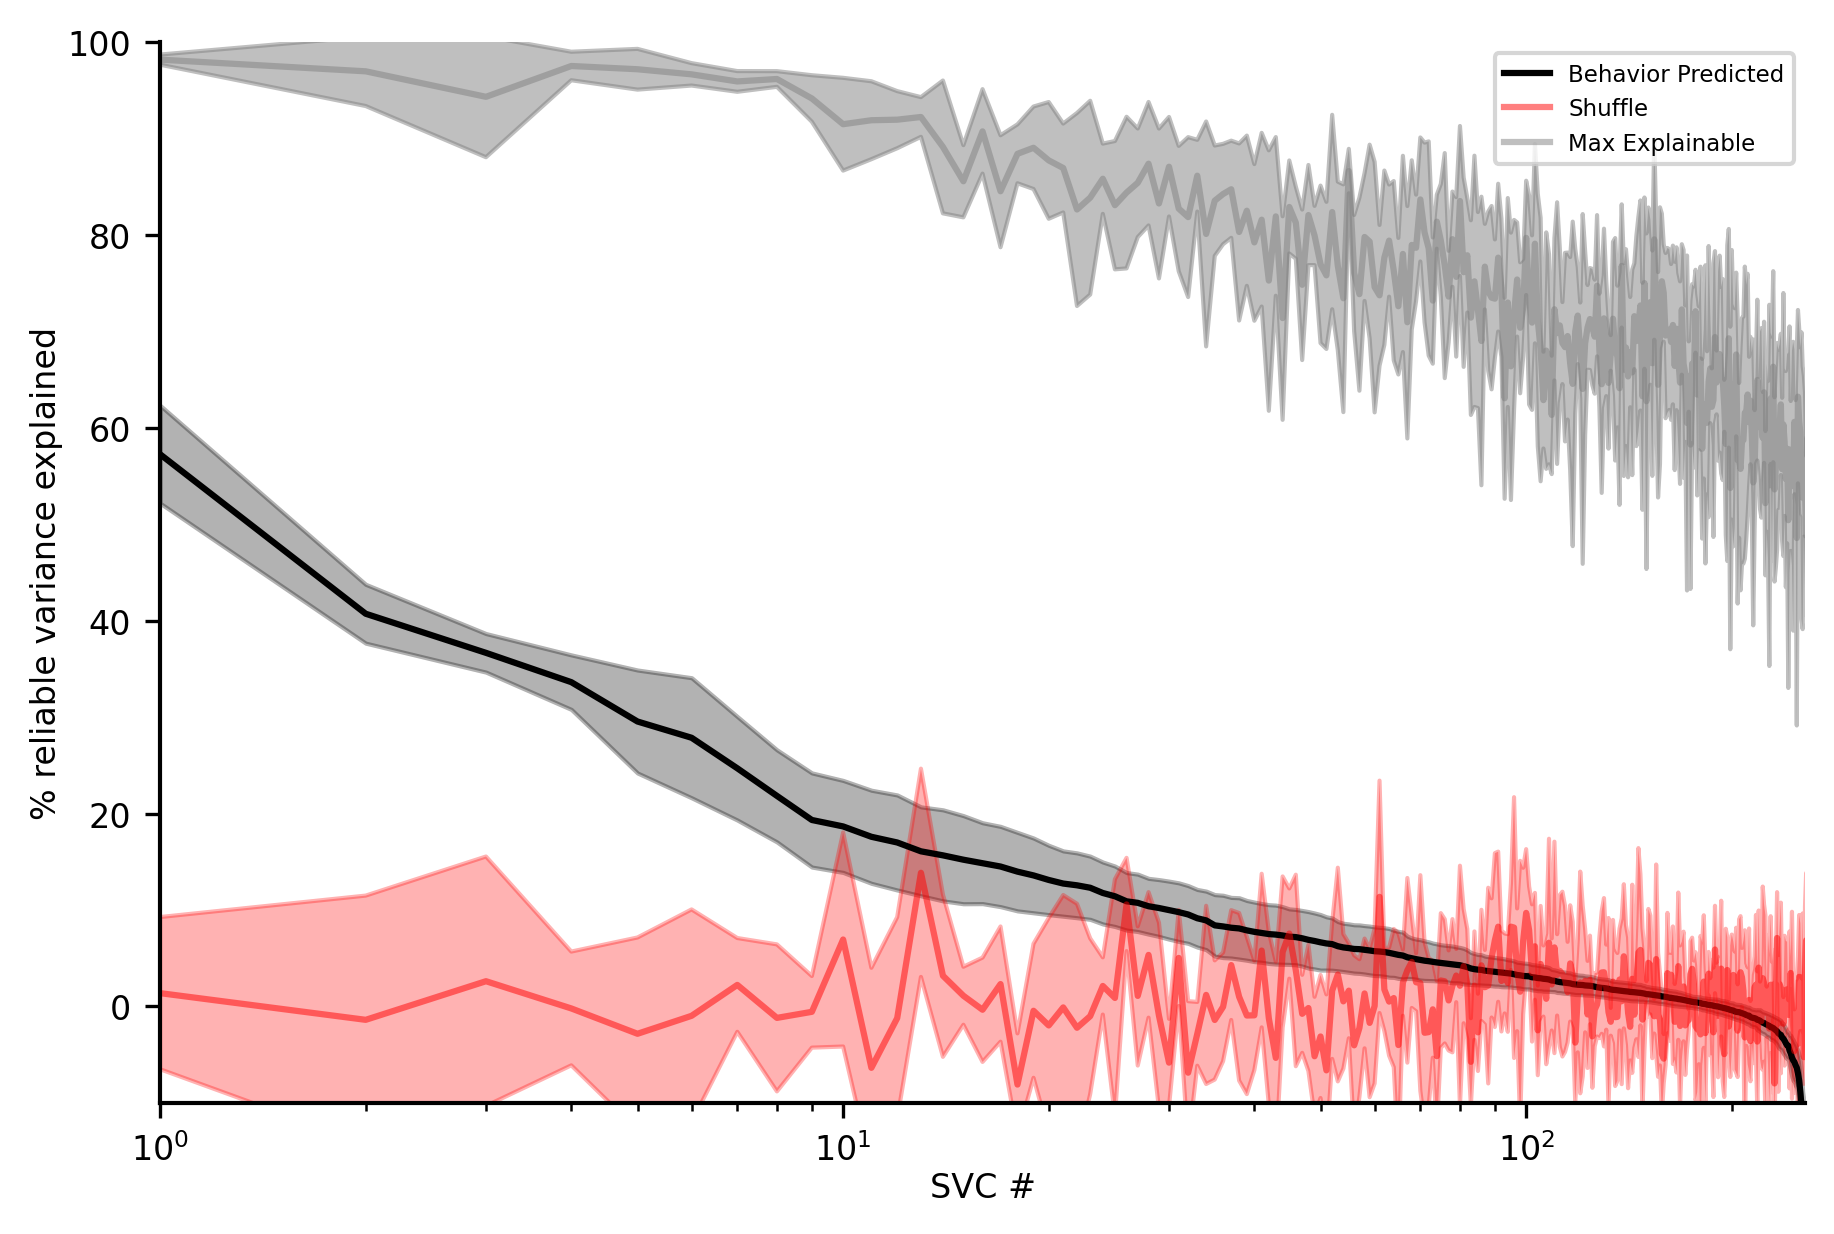

(1, 256, 5)
(1, 512, 5)
(1, 256, 6, 2, 5)


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_res_path = 'C:/Users/12770/Desktop/project_ym_update/Result/'
# mice_ids = ['m005iso1', 'm009iso1', 'm009iso2', 'm010iso1', 'm010iso2']
mice_ids = ['m010iso2']
plt.figure(figsize=(6, 4))

def sort_varexpl_per_sampling(varexpl_per_sampling):
    sorted_indices = np.argsort(varexpl_per_sampling[0], axis=0)[::-1]
    sorted_varexpl_per_sampling = np.empty_like(varexpl_per_sampling)
    for i in range(varexpl_per_sampling.shape[2]):
        sorted_varexpl_per_sampling[0, :, i] = varexpl_per_sampling[0, sorted_indices[:, i], i]
    return sorted_varexpl_per_sampling


for mouse_idx, mouse_id in enumerate(mice_ids):
    res_path = os.path.join(base_res_path, mouse_id)
    print(f"________________________________________________{mouse_id}________________________________________________________")
    data = np.load(os.path.join(res_path, 'cov_var__cov_res_behs.npy'), allow_pickle=True).item()
    cov_neurs = data['cov_neurs']
    var_neurs = data['var_neurs'] 
    cov_res_behs = data['cov_res_behs'] 
    data_shuff = np.load(os.path.join(res_path, 'cov_var__cov_res_behs_shuff.npy'), allow_pickle=True).item()
    cov_neurs_shuff = data_shuff['cov_neurs_shuff']
    var_neurs_shuff = data_shuff['var_neurs_shuff']
    
    if mouse_idx == 0:
        cov_neurs_shuff_all = cov_neurs_shuff
        var_neurs_shuff_all = var_neurs_shuff
        cov_neurs_all = cov_neurs
        var_neurs_all = var_neurs
        cov_res_behs_all = cov_res_behs
    else:
        cov_neurs_shuff_all = np.concatenate((cov_neurs_shuff_all, cov_neurs_shuff), axis=-1)
        var_neurs_shuff_all = np.concatenate((var_neurs_shuff_all, var_neurs_shuff), axis=-1)
        cov_neurs_all = np.concatenate((cov_neurs_all, cov_neurs), axis=-1)
        var_neurs_all =  np.concatenate((var_neurs_all, var_neurs), axis=-1)
        cov_res_behs_all = np.concatenate((cov_res_behs_all, cov_res_behs), axis=-1)

    if mouse_idx == len(mice_ids)-1:
        mouse_plot = 4
        cov_neurs = cov_neurs_all[:,:,mouse_plot].reshape(1,512,1)
        var_neurs = var_neurs_all[:,:,mouse_plot].reshape(1,512,1)
        cov_res_behs = cov_res_behs_all[:,:,:,:,mouse_plot].reshape(1,256, 6, 2, 1)

        varexpl_per_sampling = calc_var_expl(cov_neurs_all, cov_neurs_all, cov_res_behs_all)
        varexpl_per_sampling = sort_varexpl_per_sampling(varexpl_per_sampling)

        varexpl = np.nanmean(varexpl_per_sampling, axis=-1)
        ci95 = np.nanstd(varexpl_per_sampling, axis=-1) / np.sqrt(varexpl_per_sampling.shape[-1]) * 1.96
        
       
        plt.plot(np.arange(nsvc_predict) + 1, varexpl[-1, :] * 100, color='k', label='Behavior Predicted', alpha=1)
        plt.fill_between(np.arange(nsvc_predict) + 1,
                         (varexpl[-1, :] - ci95[-1, :]) * 100,
                         (varexpl[-1, :] + ci95[-1, :]) * 100,
                         color='k', alpha=0.3)

        relvar_shuff = np.nanmean(cov_neurs_shuff_all/var_neurs_shuff_all, axis=-1)
        relvar_shuff_std = np.nanstd(cov_neurs_shuff_all/var_neurs_shuff_all, axis=-1)
        plt.plot(np.arange(len(relvar_shuff)) + 1, relvar_shuff * 100, color='r', alpha=0.5, label='Shuffle')
        plt.fill_between(np.arange(len(relvar_shuff)) + 1, 
                         (relvar_shuff - relvar_shuff_std) * 100,
                         (relvar_shuff + relvar_shuff_std) * 100, color='r', alpha=0.3)

        relvar = np.nanmean(cov_neurs_all/var_neurs_all, axis=(0,-1))
        relvar_std = np.nanstd(cov_neurs_all/var_neurs_all, axis=(0,-1))
        plt.plot(np.arange(len(relvar)) + 1, relvar * 100, color='gray', alpha=0.5, label='Max Explainable')
        plt.fill_between(np.arange(len(relvar)) + 1, 
                         (relvar - relvar_std) * 100,
                         (relvar + relvar_std) * 100, color='gray', alpha=0.5)
        
        plt.xlabel('SVC #')
        plt.ylabel('% reliable variance explained')
        plt.xscale('log')
        plt.xlim([1, 256])
        plt.ylim([-10, 100])

plt.legend()
fig_folder = os.path.join(res_path, "fig6")
os.makedirs(fig_folder, exist_ok=True)
output_path_pdf = os.path.join(fig_folder, "reliable_variance_explained.pdf")
output_path_png = os.path.join(fig_folder, "reliable_variance_explained.png")
plt.savefig(output_path_pdf, dpi=600, format='pdf')
plt.savefig(output_path_png, dpi=600, format='png')
plt.show()

print(varexpl_per_sampling.shape)
print(cov_neurs_all.shape)
print(cov_res_behs_all.shape)



________________________________________________m005iso1________________________________________________________
________________________________________________m009iso1________________________________________________________
________________________________________________m009iso2________________________________________________________
________________________________________________m010iso1________________________________________________________
________________________________________________m010iso2________________________________________________________


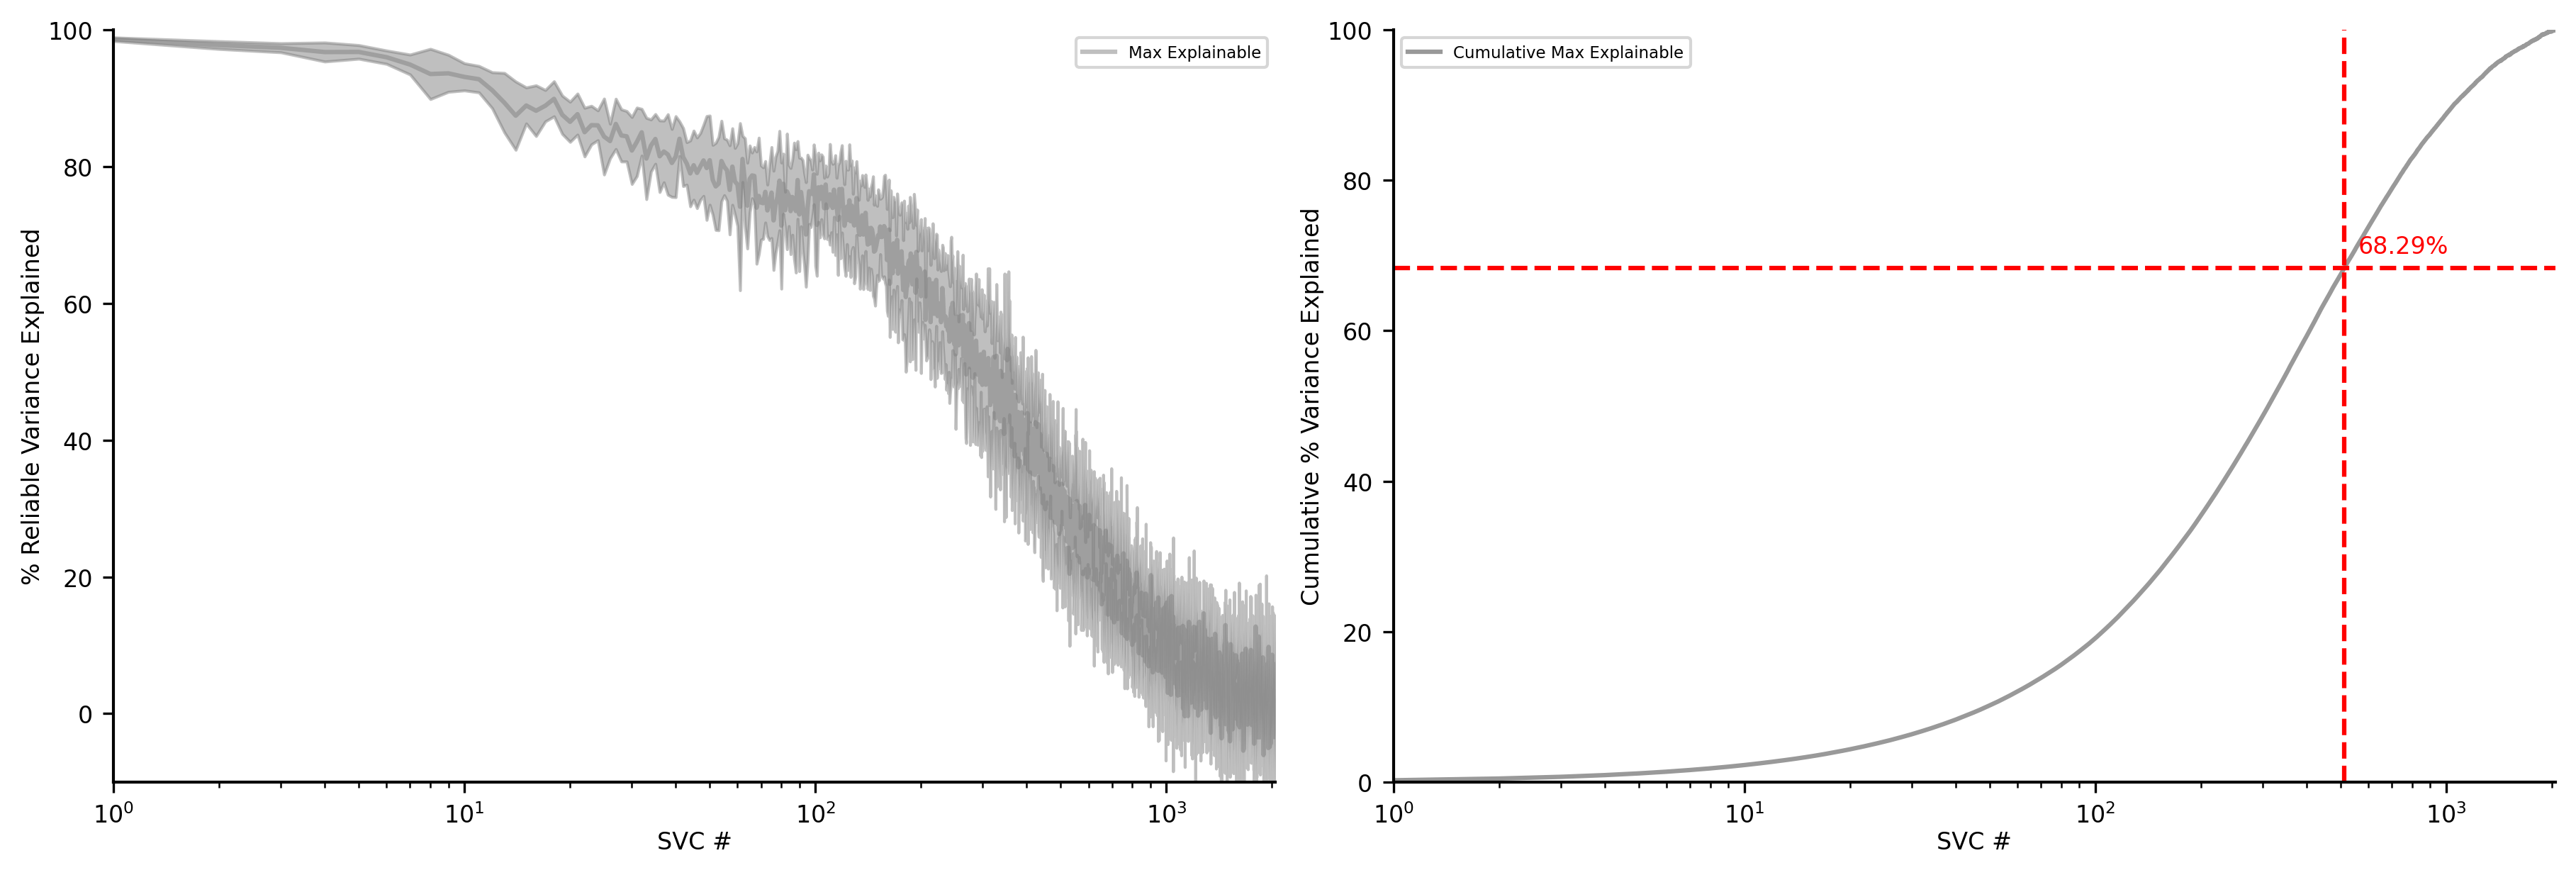

(1, 2048, 5)


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import os

base_res_path = 'C:/Users/12770/Desktop/project_ym/SVCA/Result/'
mice_ids = ['m005iso1', 'm009iso1', 'm009iso2', 'm010iso1', 'm010iso2']

plt.figure(figsize=(12, 4))

def sort_varexpl_per_sampling(varexpl_per_sampling):
    sorted_indices = np.argsort(varexpl_per_sampling[0], axis=0)[::-1]
    sorted_varexpl_per_sampling = np.empty_like(varexpl_per_sampling)
    for i in range(varexpl_per_sampling.shape[2]):
        sorted_varexpl_per_sampling[0, :, i] = varexpl_per_sampling[0, sorted_indices[:, i], i]
    return sorted_varexpl_per_sampling

for mouse_idx, mouse_id in enumerate(mice_ids):
    res_path = os.path.join(base_res_path, mouse_id)
    print(f"________________________________________________{mouse_id}________________________________________________________")
    data = np.load(os.path.join(res_path, 'cov_var__cov_res_behs.npy'), allow_pickle=True).item()
    cov_neurs = data['cov_neurs']
    var_neurs = data['var_neurs'] 
    data_shuff = np.load(os.path.join(res_path, 'cov_var__cov_res_behs_shuff.npy'), allow_pickle=True).item()
    cov_neurs_shuff = data_shuff['cov_neurs_shuff']
    var_neurs_shuff = data_shuff['var_neurs_shuff']
    
    if mouse_idx == 0:
        cov_neurs_all = cov_neurs
        var_neurs_all = var_neurs
        cov_neurs_shuff_all = cov_neurs_shuff
        var_neurs_shuff_all = var_neurs_shuff
    else:
        cov_neurs_all = np.concatenate((cov_neurs_all, cov_neurs), axis=-1)
        var_neurs_all = np.concatenate((var_neurs_all, var_neurs), axis=-1)
        cov_neurs_shuff_all = np.concatenate((cov_neurs_shuff_all, cov_neurs_shuff), axis=-1)
        var_neurs_shuff_all = np.concatenate((var_neurs_shuff_all, var_neurs_shuff), axis=-1)

    if mouse_idx == len(mice_ids)-1:
        # Plot max explainable variance
        relvar = np.nanmean(cov_neurs_all / var_neurs_all, axis=(0, -1))
        relvar_std = np.nanstd(cov_neurs_all / var_neurs_all, axis=(0, -1))
        
        plt.subplot(1, 2, 1)
        plt.plot(np.arange(len(relvar)) + 1, relvar * 100, color='gray', alpha=0.5, label='Max Explainable')
        plt.fill_between(np.arange(len(relvar)) + 1, 
                         (relvar - relvar_std) * 100,
                         (relvar + relvar_std) * 100, color='gray', alpha=0.5)
        plt.xlabel('SVC #')
        plt.ylabel('% Reliable Variance Explained')
        plt.xscale('log')
        plt.xlim([1, 2048])
        plt.ylim([-10, 100])
        plt.legend()

        # Cumulative plot
        plt.subplot(1, 2, 2)
        cumulative_relvar = np.cumsum(relvar)
        cumulative_relvar /= cumulative_relvar[-1]
        cumulative_relvar *= 100
        
        plt.plot(np.arange(len(cumulative_relvar)) + 1, cumulative_relvar, color='gray', alpha=0.8, label='Cumulative Max Explainable')
        
        # Add red dashed lines at SVC = 512
        svc_index = 512
        cumulative_value_at_svc = cumulative_relvar[svc_index - 1]  # Index is zero-based
        
        plt.axvline(x=svc_index, color='red', linestyle='--')
        plt.axhline(y=cumulative_value_at_svc, color='red', linestyle='--')
        
        # Annotate the cumulative value on the y-axis
        plt.text(svc_index + 50, cumulative_value_at_svc + 2, f'{cumulative_value_at_svc:.2f}%', color='red')

        plt.xlabel('SVC #')
        plt.ylabel('Cumulative % Variance Explained')
        plt.xscale('log')
        plt.xlim([1, 2048])
        plt.ylim([0, 100])
        plt.legend()

fig_folder = os.path.join(res_path, "fig6")
os.makedirs(fig_folder, exist_ok=True)
output_path_pdf = os.path.join(fig_folder, "SI9.pdf")
output_path_png = os.path.join(fig_folder, "SI9.png")
plt.savefig(output_path_pdf, dpi=600, format='pdf')
plt.savefig(output_path_png, dpi=600, format='png')
plt.show()

print(cov_neurs_all.shape)
